In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
tickets = pd.read_csv("ParkingCitations.csv")
tickets['IssuedDate'] = pd.to_datetime(tickets['IssuedDate'])

In [3]:
tickets['Year'] = tickets['IssuedDate'].dt.year
tickets['Month'] = tickets['IssuedDate'].dt.month
tickets[tickets["Fine"] > 0].groupby("Year").mean("Fine")

,Fine,Unpaid,Officer,Month
Year,,,,
2010,24.613265,0.049213,3.349485,9.568141
2011,25.132525,0.050712,3.276226,4.936004
2012,24.467674,0.055835,3.585747,6.625735
2013,24.392991,0.065353,3.378648,5.364804
2014,25.797196,0.087882,3.478092,6.886580
2015,30.639915,0.041106,3.943830,6.465617
2016,32.657759,0.031977,3.600626,5.790809
2017,46.322821,0.042050,3.956198,1.533947
2018,48.428571,0.032468,4.000000,5.350649


In [4]:
bystate = tickets[tickets["Fine"] > 0].groupby(["Year", "Residence"]).mean("Fine")["Fine"].reset_index()

In [5]:
bystate.sort_values(by='Fine', ascending=False)

,Year,Residence,Fine
399,2017,AR,200.0
525,2020,HI,150.0
398,2017,AL,144.0
103,2011,RI,138.0
9,2010,CT,90.0
...,...,...,...
69,2011,FO,13.5
55,2010,WV,10.0
295,2015,FO,10.0
555,2020,RI,10.0


In [6]:
tickets[(tickets["Fine"] > 0) & (tickets["Year"] == 2022)].groupby("Officer").mean("Fine").reset_index()

,Officer,Fine,Unpaid,Year,Month
0,1.0,55.994118,0.207692,2022.0,6.486425
1,2.0,56.327189,0.221198,2022.0,9.525346
2,3.0,60.839385,0.184358,2022.0,10.625698
3,4.0,56.378465,0.218550,2022.0,5.771322
4,5.0,56.084507,0.192153,2022.0,6.275654
5,6.0,55.459161,0.221854,2022.0,6.188742
6,7.0,56.062926,0.213424,2022.0,6.217619
7,8.0,55.814937,0.206480,2022.0,6.473366


In [7]:
tickets[(tickets["Fine"] > 0) & (tickets["Year"] == 2022)].groupby("Officer").mean("Fine").reset_index()

,Officer,Fine,Unpaid,Year,Month
0,1.0,55.994118,0.207692,2022.0,6.486425
1,2.0,56.327189,0.221198,2022.0,9.525346
2,3.0,60.839385,0.184358,2022.0,10.625698
3,4.0,56.378465,0.218550,2022.0,5.771322
4,5.0,56.084507,0.192153,2022.0,6.275654
5,6.0,55.459161,0.221854,2022.0,6.188742
6,7.0,56.062926,0.213424,2022.0,6.217619
7,8.0,55.814937,0.206480,2022.0,6.473366


In [8]:
tickets[(tickets["Fine"] > 0) & (tickets["Year"] == 2020)].groupby("Officer").mean("Fine").reset_index()

,Officer,Fine,Unpaid,Year,Month
0,1.0,48.266553,0.168081,2020.0,5.558574
1,3.0,49.271122,0.126103,2020.0,4.968474
2,4.0,48.368196,0.149413,2020.0,5.447172
3,5.0,48.177758,0.146764,2020.0,5.044667
4,6.0,51.982544,0.165420,2020.0,5.298421
5,7.0,48.243667,0.153197,2020.0,5.855247
6,8.0,49.622590,0.145087,2020.0,5.157943


In [28]:
residences = tickets.groupby("Residence").size().reset_index()
residences.columns = ["Residence", "Count"]
residences["Prop"] = residences["Count"]/np.sum(residences["Count"])
residences.sort_values(by="Count", ascending=False).reset_index().head(6)

,index,Residence,Count,Prop
0,64,UT,100090,0.656780
1,9,CA,9568,0.062784
2,6,AZ,6071,0.039837
3,22,ID,5864,0.038479
4,62,TX,4510,0.029594
5,69,WA,3968,0.026038


In [10]:
bymonth = tickets[tickets["Fine"] > 0].groupby(["Year", "Month"]).mean("Fine")[["Fine", "Unpaid"]].reset_index()
bymonth['Count'] = tickets[tickets["Fine"] > 0].groupby(["Year", "Month"]).size().reset_index(drop=True)

In [11]:
bymonth.sort_values(by="Fine", ascending=False).to_csv("FinesByMonth.csv", index=False)

In [12]:
revenue = tickets[(tickets["Fine"] > 0) & (tickets["Unpaid"] == False)].groupby(["Year", "Month"]).sum("Fine")["Fine"].reset_index()
revenue["Count"] = tickets[(tickets["Fine"] > 0) & (tickets["Unpaid"] == False)].groupby(["Year", "Month"]).size().reset_index(drop=True)

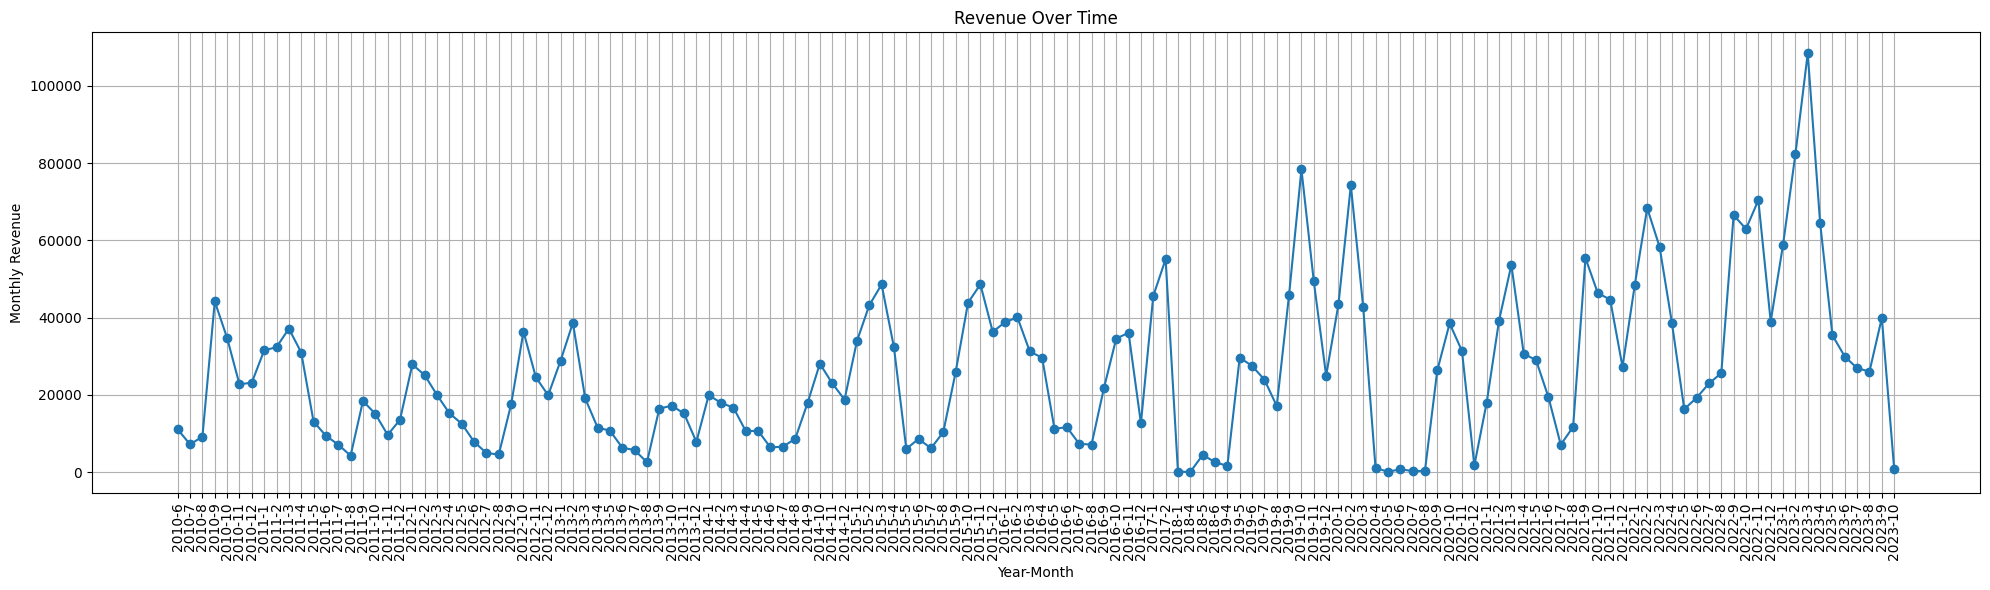

In [16]:
plt.figure(figsize=(20, 6))
plt.plot(revenue["Year"].astype(str) + "-" + revenue["Month"].astype(str), revenue["Fine"], marker='o')
plt.title('Revenue Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Monthly Revenue')
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()

In [30]:
revenue[revenue["Year"] == 2022]["Fine"].sum()

536956.0

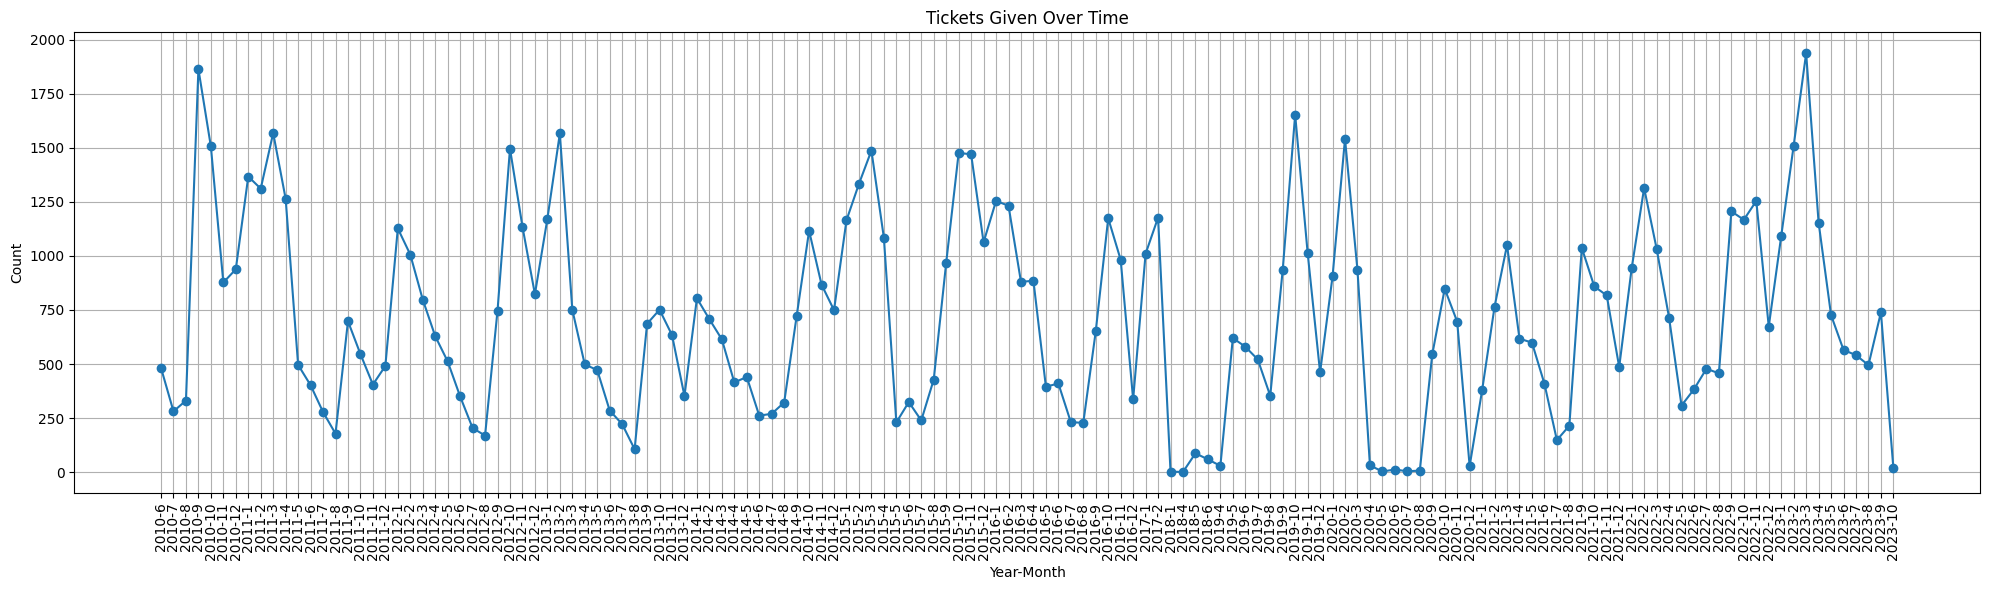

In [18]:
plt.figure(figsize=(20, 6))
plt.plot(revenue["Year"].astype(str) + "-" + revenue["Month"].astype(str), revenue["Count"], marker='o')
plt.title('Tickets Given Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()

In [19]:
years = range(2022, 2023+1)
for year in years:
    calendar = pd.read_html(f"https://academiccalendar.byu.edu/{year}-calendar-list-view")[0]
    print(calendar)

                    0                                             1
0     January 3, 2022                    Start of Classes (1st day)
1    January 10, 2022  Add/Drop Deadline (Full Semester & 1st Term)
2    January 17, 2022                     Martin Luther King Jr Day
3    February 7, 2022                    1st Term Withdraw Deadline
4   February 21, 2022                                Presidents Day
..                ...                                           ...
67  December 22, 2022                      Fall Semester Grades Due
68  December 23, 2022                      Christmas Eve (observed)
69  December 26, 2022                      Christmas Day (observed)
70  December 27, 2022                   Fall Semester Grades Online
71  December 30, 2022                      New Years Eve (observed)

[72 rows x 2 columns]
                    0                                             1
0     January 2, 2023                         New Years Day Holiday
1     January 7, 2023    